In [1]:
import sys
from pathlib import Path

In [2]:
project_root = Path.cwd().parent
src_path = project_root / "src"

if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.transforms import v2

import torchmetrics


import os
from pathlib import Path
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils.general import get_data
from src.preprocess_pipeline import star_removal

import skimage as ski

torch.manual_seed(42)
np.random.seed(42)
torch.__version__

/home/arpola/Documents/GalaxyClassifier/.venv/lib/python3.12/site-packages/astroNN/__init__.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution
2025-08-04 23:26:55.630086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754360815.641301   33432 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754360815.644723   33432 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754360815.654714   33432 computation_pl

'2.7.1+cu126'

In [ ]:
# Load both versions explicitly
images_original, _ = get_data(cleaned=False)
images_cleaned, _ = get_data(cleaned=True)

No cleaned images found, please pre process them. Downloading normal images instead.


In [ ]:
imagee = images_original[333]

In [ ]:
original_img = images_original[333]
cleaned_img = images_cleaned[333]

# Check if they're actually different
print(f"Images are identical: {np.array_equal(original_img, cleaned_img)}")
print(f"Max difference: {np.abs(original_img - cleaned_img).max()}")

In [ ]:
cleaned_img, _ = star_removal(imagee)
Image.fromarray(cleaned_img)

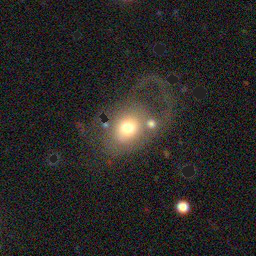

In [12]:
cleaned_img, _ = star_removal(imagee)
Image.fromarray(cleaned_img.transpose(1,2,0))

In [ ]:
imagee.shape